<a href="https://colab.research.google.com/github/hktimmana/first-cat/blob/master/DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
#github access token ='e2058c653da64e011154ccfb80b2aff54276a744'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!rm -r /content/gdrive/My\ Drive/research/format/

In [13]:
!pip install -q split-folders tqdm
import split_folders
image_source_dir='/content/gdrive/My Drive/research/format/'
image_dest_dir='/content/gdrive/My Drive/research/final/'
for m in ['40X','100X','200X','400X']:
  split_folders.ratio(image_source_dir+m, output=image_dest_dir+m, seed=42, ratio=(.7, .2, .1))

Copying files: 1995 files [00:41, 48.43 files/s]
Copying files: 2081 files [00:41, 49.58 files/s]
Copying files: 2013 files [00:42, 47.06 files/s]
Copying files: 1820 files [00:37, 48.36 files/s]


In [17]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [18]:
IMG_DIM = (150, 150)

train_files = glob.glob('/content/gdrive/My Drive/research/final/**/train/**/*.png')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[-2].strip() for fn in train_files]

validation_files = glob.glob('/content/gdrive/My Drive/research/final/**/val/**/*.png')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-2].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape,validation_labels)

Train dataset shape: (5523, 150, 150, 3) 	Validation dataset shape: (1570, 150, 150, 3) ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC

(150, 150, 3)


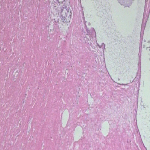

In [19]:
model_path='/content/gdrive/My Drive/research/model/'
breakhis_base_cnn='breakhis_base_cnn'
breakhis_cnn_aug='breakhis_cnn_aug'
breakhis_vgg16_tl='breakhis_vgg16_tl'
breakhis_img_aug='breakhis_img_aug'
breakhis_fine_aug='breakhis_fine_aug'
import json
def save_history(hist,name):
  with open(model_path+name+'.json', 'w') as f:
    json.dump(hist.history.astype(float), f)

def plot_Training(history,title):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  t = f.suptitle(title, fontsize=12)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1,101))
  ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
  ax1.set_xticks(np.arange(0, 101, 5))
  ax1.set_ylabel('Accuracy Value')
  ax1.set_xlabel('Epoch')
  ax1.set_title('Accuracy')
  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
  ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
  ax2.set_xticks(np.arange(0, 101, 5))
  ax2.set_ylabel('Loss Value')
  ax2.set_xlabel('Epoch')
  ax2.set_title('Loss')
  l2 = ax2.legend(loc="best")

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [20]:
batch_size = 30
num_classes = 8
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


label_encoder = LabelEncoder()
train_encoded = label_encoder.fit_transform(train_labels)
onehot_encoder = OneHotEncoder(sparse=False)
train_encoded = train_encoded.reshape(len(train_encoded), 1)
train_labels_enc = onehot_encoder.fit_transform(train_encoded)
valid_encoded = label_encoder.fit_transform(validation_labels)
valid_encoded = valid_encoded.reshape(len(valid_encoded), 1)
validation_labels_enc = onehot_encoder.fit_transform(valid_encoded)
print(train_labels[100:111], train_labels_enc[100:111])

['DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC', 'DC'] [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [21]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf
from keras import backend as K
#from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(tf.distribute.cluster_resolver.TPUClusterResolver())
# initialize our CancerNet model and compile it
with strategy.scope():  
  model = Sequential(name='BiherNet')

  model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                  input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(8, activation='softmax'))
  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(),
                metrics=['accuracy'])

  model.summary()

INFO:tensorflow:Initializing the TPU system: grpc://10.9.189.202:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.9.189.202:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "BiherNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147

In [22]:
epochs = 100
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=100, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+breakhis_base_cnn+'.h5', save_best_only=True, verbose=2)
history1 = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,callbacks=[early_stopping, model_checkpoint])
model.save('/content/gdrive/My Drive/research/model/breakhis_base_cnn_full.h5')
save_history(history1,breakhis_base_cnn)

Train on 5523 samples, validate on 1570 samples
Epoch 1/100
5523/5523 [==============================] - 37s 7ms/step - loss: 0.3390 - accuracy: 0.8816 - val_loss: 0.3206 - val_accuracy: 0.8813

Epoch 00001: val_loss improved from inf to 0.32055, saving model to /content/gdrive/My Drive/research/model/breakhis_base_cnn.h5
Epoch 2/100
5523/5523 [==============================] - 36s 7ms/step - loss: 0.3047 - accuracy: 0.8884 - val_loss: 0.3055 - val_accuracy: 0.8967

Epoch 00002: val_loss improved from 0.32055 to 0.30549, saving model to /content/gdrive/My Drive/research/model/breakhis_base_cnn.h5
Epoch 3/100
5523/5523 [==============================] - 36s 7ms/step - loss: 0.2966 - accuracy: 0.8907 - val_loss: 0.2845 - val_accuracy: 0.8933

Epoch 00003: val_loss improved from 0.30549 to 0.28453, saving model to /content/gdrive/My Drive/research/model/breakhis_base_cnn.h5
Epoch 4/100
5523/5523 [==============================] - 36s 7ms/step - loss: 0.2857 - accuracy: 0.8933 - val_loss: 

TypeError: ignored

In [0]:
def save_history(hist,name):
  with open(model_path+name+'.json', 'w') as f:
    json.dump(str(hist.history), f)
save_history(history1,breakhis_base_cnn)

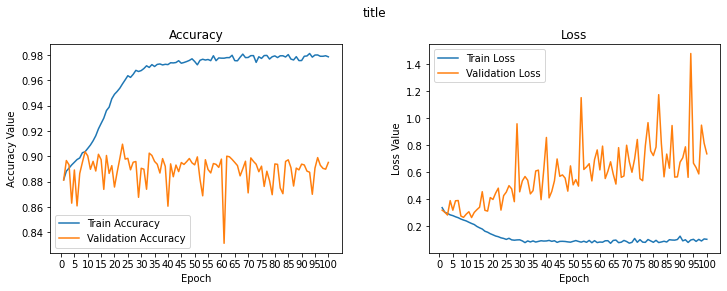

In [34]:
def plot_Training(history,title):
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  t = f.suptitle('{}'.format(title), fontsize=12)
  #t = f.suptitle('title', fontsize=12)
  f.subplots_adjust(top=0.85, wspace=0.3)

  epoch_list = list(range(1,101))
  ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
  ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
  ax1.set_xticks(np.arange(0, 101, 5))
  ax1.set_ylabel('Accuracy Value')
  ax1.set_xlabel('Epoch')
  ax1.set_title('Accuracy')
  l1 = ax1.legend(loc="best")

  ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
  ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
  ax2.set_xticks(np.arange(0, 101, 5))
  ax2.set_ylabel('Loss Value')
  ax2.set_xlabel('Epoch')
  ax2.set_title('Loss')
  l2 = ax2.legend(loc="best")
plot_Training(history1,'Basic CNN model')


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['MC', 'MC', 'MC', 'MC', 'MC']


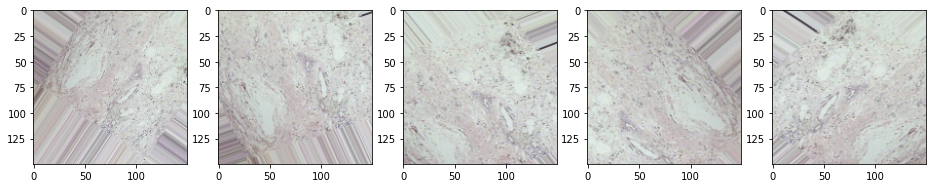

In [36]:
img_id = 1111
mc_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
mc = [next(mc_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in mc])
l = [ax[i].imshow(mc[i][0][0]) for i in range(0,5)]

Labels: ['A', 'A', 'A', 'A', 'A']


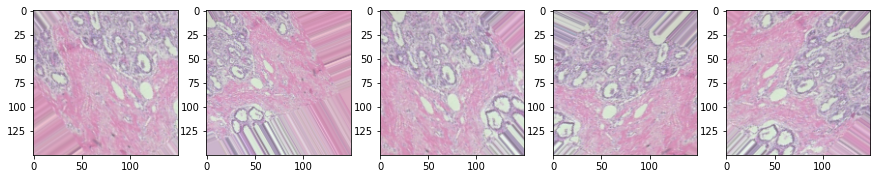

In [37]:
img_id = 10
a_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
a= [next(a_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in a])
l = [ax[i].imshow(a[i][0][0]) for i in range(0,5)]

In [38]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
with strategy.scope():  
    model = Sequential()

    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                    input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(8, activation='softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['accuracy'])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=20, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+breakhis_cnn_aug+'.h5', save_best_only=True, verbose=2)              
history2 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1,callbacks=[early_stopping, model_checkpoint]) 
save_history(history2,breakhis_cnn_aug)

Epoch 1/100
100/100 [==============================] - 22s 217ms/step - loss: 0.3216 - accuracy: 0.8799 - val_loss: 0.3684 - val_accuracy: 0.8906

Epoch 00001: val_loss improved from inf to 0.36838, saving model to /content/gdrive/My Drive/research/model/breakhis_cnn_aug.h5
Epoch 2/100
100/100 [==============================] - 20s 205ms/step - loss: 0.3127 - accuracy: 0.8857 - val_loss: 0.2508 - val_accuracy: 0.8923

Epoch 00002: val_loss improved from 0.36838 to 0.25080, saving model to /content/gdrive/My Drive/research/model/breakhis_cnn_aug.h5
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 0.3033 - accuracy: 0.8870 - val_loss: 0.2805 - val_accuracy: 0.8881

Epoch 00003: val_loss did not improve from 0.25080
Epoch 4/100
100/100 [==============================] - 21s 205ms/step - loss: 0.2947 - accuracy: 0.8866 - val_loss: 0.3046 - val_accuracy: 0.8859

Epoch 00004: val_loss did not improve from 0.25080
Epoch 5/100
100/100 [=============================

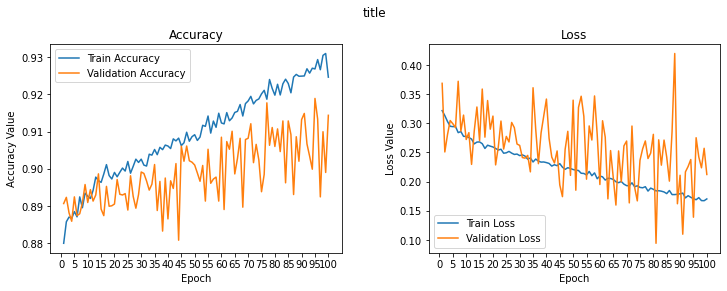

In [39]:
plot_Training(history2,'CNN With Image augmentation')

Leveraging Transfer Learning with Pre-trained CNN Models


Pre-trained CNN model as a Feature Extractor

In [40]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

58892288/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fdb00826f60>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fdb00826a20>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fdb008267f0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fdb00821780>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fdb00821ba8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fdb00899518>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fdb0083cbe0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fdb0083ca20>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fdb0083a6d8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fdb008402b0>,block3_conv3,False


(1, 4, 4, 512)


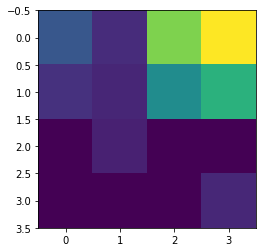

In [41]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [42]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (5523, 8192) 	Validation Bottleneck Features: (1570, 8192)


In [43]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
with strategy.scope():  
  input_shape = vgg_model.output_shape[1]

  model = Sequential()
  model.add(InputLayer(input_shape=(input_shape,)))
  model.add(Dense(512, activation='relu', input_dim=input_shape))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(8, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 4104      
Total params: 4,461,576
Trainable params: 4,461,576
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=20, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+breakhis_vgg16_tl+'.h5', save_best_only=True, verbose=2)
history3 = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,callbacks=[early_stopping, model_checkpoint]) 
save_history(history3,breakhis_vgg16_tl)

Train on 5523 samples, validate on 1570 samples
Epoch 1/100
5523/5523 [==============================] - 10s 2ms/step - loss: 0.3170 - accuracy: 0.8817 - val_loss: 0.3036 - val_accuracy: 0.8826

Epoch 00001: val_loss improved from inf to 0.30360, saving model to /content/gdrive/My Drive/research/model/breakhis_vgg16_tl.h5
Epoch 2/100
5523/5523 [==============================] - 10s 2ms/step - loss: 0.2845 - accuracy: 0.8909 - val_loss: 0.2895 - val_accuracy: 0.8887

Epoch 00002: val_loss improved from 0.30360 to 0.28951, saving model to /content/gdrive/My Drive/research/model/breakhis_vgg16_tl.h5
Epoch 3/100
5523/5523 [==============================] - 10s 2ms/step - loss: 0.2633 - accuracy: 0.8980 - val_loss: 0.2876 - val_accuracy: 0.8884

Epoch 00003: val_loss improved from 0.28951 to 0.28761, saving model to /content/gdrive/My Drive/research/model/breakhis_vgg16_tl.h5
Epoch 4/100
5523/5523 [==============================] - 10s 2ms/step - loss: 0.2484 - accuracy: 0.9029 - val_loss: 

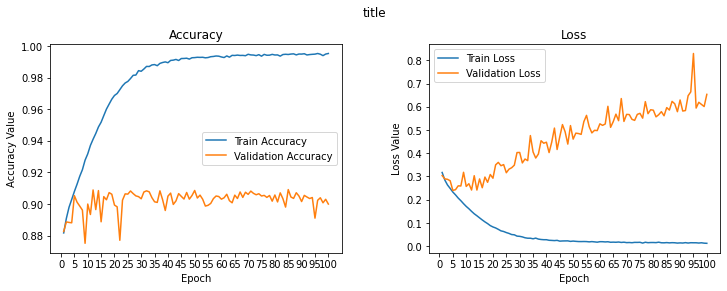

In [46]:
plot_Training(history3,'Transfer Learning With VGG16')

Pre-trained CNN model as a Feature Extractor with Image Augmentation


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [48]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
with strategy.scope(): 
  model = Sequential()
  model.add(vgg_model)
  model.add(Dense(512, activation='relu', input_dim=input_shape))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(8, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=100, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+breakhis_img_aug+'.h5', save_best_only=True, verbose=2)
              
history4 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1,callbacks=[early_stopping, model_checkpoint]) 
save_history(history4,breakhis_img_aug) 

Epoch 1/100
100/100 [==============================] - 33s 335ms/step - loss: 0.3431 - accuracy: 0.8721 - val_loss: 0.2781 - val_accuracy: 0.8809

Epoch 00001: val_loss improved from inf to 0.27808, saving model to /content/gdrive/My Drive/research/model/breakhis_img_aug.h5
Epoch 2/100
100/100 [==============================] - 33s 327ms/step - loss: 0.3255 - accuracy: 0.8751 - val_loss: 0.3409 - val_accuracy: 0.8814

Epoch 00002: val_loss did not improve from 0.27808
Epoch 3/100
100/100 [==============================] - 32s 323ms/step - loss: 0.3201 - accuracy: 0.8796 - val_loss: 0.2880 - val_accuracy: 0.8892

Epoch 00003: val_loss did not improve from 0.27808
Epoch 4/100
100/100 [==============================] - 33s 328ms/step - loss: 0.3139 - accuracy: 0.8802 - val_loss: 0.3389 - val_accuracy: 0.8923

Epoch 00004: val_loss did not improve from 0.27808
Epoch 5/100
100/100 [==============================] - 33s 327ms/step - loss: 0.3150 - accuracy: 0.8823 - val_loss: 0.3594 - val_ac

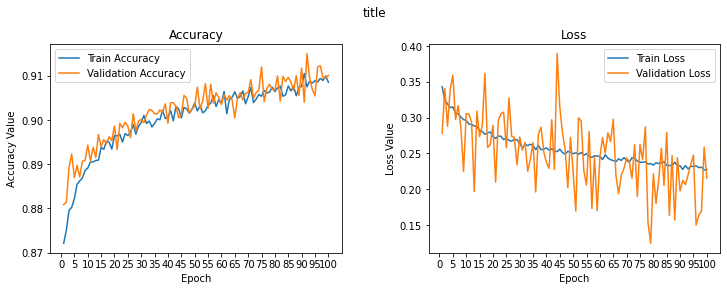

In [49]:
plot_Training(history4,'Transfer Learning with Image augmentation')

Pre-trained CNN model with Fine-tuning and Image Augmentation

In [50]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fdb00826f60>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fdb00826a20>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fdb008267f0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fdb00821780>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fdb00821ba8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fdb00899518>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fdb0083cbe0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fdb0083ca20>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fdb0083a6d8>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fdb008402b0>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
with strategy.scope(): 
  model = Sequential()
  model.add(vgg_model)
  model.add(Dense(512, activation='relu', input_dim=input_shape))
  model.add(Dropout(0.3))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(8, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.01, nesterov=True),
              metrics=['accuracy'])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='accuracy', mode='max', patience=20, verbose=2)
model_checkpoint = ModelCheckpoint(model_path+breakhis_fine_aug+'.h5', save_best_only=True, verbose=2)
              
history5 = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1,callbacks=[early_stopping, model_checkpoint])   
save_history(history5,breakhis_fine_aug) 

Epoch 1/100
100/100 [==============================] - 68s 678ms/step - loss: 0.2991 - accuracy: 0.8935 - val_loss: 0.2608 - val_accuracy: 0.9041

Epoch 00001: val_loss improved from inf to 0.26078, saving model to /content/gdrive/My Drive/research/model/breakhis_fine_aug.h5
Epoch 2/100
100/100 [==============================] - 67s 670ms/step - loss: 0.2727 - accuracy: 0.8970 - val_loss: 0.1909 - val_accuracy: 0.9134

Epoch 00002: val_loss improved from 0.26078 to 0.19093, saving model to /content/gdrive/My Drive/research/model/breakhis_fine_aug.h5
Epoch 3/100
100/100 [==============================] - 67s 669ms/step - loss: 0.2561 - accuracy: 0.9018 - val_loss: 0.2074 - val_accuracy: 0.9091

Epoch 00003: val_loss did not improve from 0.19093
Epoch 4/100
100/100 [==============================] - 68s 678ms/step - loss: 0.2489 - accuracy: 0.9047 - val_loss: 0.2278 - val_accuracy: 0.9121

Epoch 00004: val_loss did not improve from 0.19093
Epoch 5/100
100/100 [===========================

In [0]:
plot_Training(history5,'VGG16 Fine tune Transfer Learning Image augmentation')

Evaluating our Deep Learning Models on Test Data

In [0]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
#import model_evaluation_utils as meu
%matplotlib inline

# load saved models
#basic_cnn = load_model('tl_base_model_full.h5')
#img_aug_cnn = load_model('tl_base_model_aug_full.h5')
#tl_cnn = load_model('tl_base_model_tl_full.h5')
#tl_img_aug_cnn = load_model('tl_model_cnn_aug_full.h5')
#tl_img_aug_finetune_cnn = load_model('tl_fine_cnn_aug_full.h5')
basic_cnn = load_model(model_path+breakhis_base_cnn+'.h5')
img_aug_cnn = load_model(model_path+breakhis_cnn_aug+'.h5')
tl_cnn = load_model(model_path+breakhis_vgg16_tl+'.h5')
tl_img_aug_cnn = load_model(model_path+breakhis_img_aug+'.h5')
tl_img_aug_finetune_cnn = load_model(model_path+breakhis_fine_aug+'.h5')
# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
#num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
#class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]
le=LabelEncoder()
def class2num_label_transformer(lables):
  return le.fit_transform(labels)
def num2class_label_transformer(lablels):
  return le.inverse_transform(labels)
# load VGG model for bottleneck features
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                  input_shape=input_shape)
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [0]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model
#import model_evaluation_utils as meu
%matplotlib inline
basic_cnn = load_model(model_path+'tl_base_model_full.h5')
tl_img_aug_finetune_cnn=load_model(model_path+'tl_base_model_tl_full.h5')
# load other configurations
IMG_DIM = (150, 150)
input_shape = (150, 150, 3)
#num2class_label_transformer = lambda l: ['cat' if x == 0 else 'dog' for x in l]
#class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]
le=LabelEncoder()

In [0]:
IMG_DIM = (150, 150)

test_files = glob.glob('/content/gdrive/My Drive/research/final/**/train/**/*.png')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[-2].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255
test_labels_enc = le.fit_transform(test_labels)

print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

In [0]:
le=LabelEncoder()
test_labels_enc = le.fit_transform(test_labels)
print('Test dataset shape:', test_imgs.shape)
print(test_labels[0:5], test_labels_enc[0:5])

Test dataset shape: (5523, 150, 150, 3)
['A', 'A', 'A', 'A', 'A'] [0 0 0 0 0]


In [0]:
predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = le.inverse_transform(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model Performance metrics:
------------------------------
Accuracy: 0.6692
Precision: 0.6886
Recall: 0.6692
F1 Score: 0.6533

Model Classification report:
------------------------------
              precision    recall  f1-score   support

          DC       0.73      0.88      0.80      2414
          PT       0.79      0.49      0.61       315
           F       0.67      0.55      0.60       708
          PC       0.78      0.21      0.32       390
           A       0.89      0.69      0.78       309
          TA       0.45      0.85      0.58       398
          MC       0.67      0.42      0.51       553
          LC       0.43      0.41      0.42       436

    accuracy                           0.67      5523
   macro avg       0.68      0.56      0.58      5523
weighted avg       0.69      0.67      0.65      5523


Prediction Confusion Matrix:
------------------------------


TypeError: ignored

Model 1: Basic CNN Performance

In [0]:
predictions = basic_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = le.inverse_transform(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model 2: Basic CNN with Image Augmentation Performance

In [0]:
predictions = img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = le.inverse_transform(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model 3: Transfer Learning — Pre-trained CNN as a Feature Extractor Performance

In [0]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)

predictions = tl_cnn.predict_classes(test_bottleneck_features, verbose=0)
predictions = le.inverse_transform(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model 4: Transfer Learning — Pre-trained CNN as a Feature Extractor with Image Augmentation Performance

In [0]:
predictions = tl_img_aug_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = le.inverse_transform(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

Model 5: Transfer Learning — Pre-trained CNN with Fine-tuning and Image Augmentation Performance

In [0]:
predictions = tl_img_aug_finetune_cnn.predict_classes(test_imgs_scaled, verbose=0)
predictions = le.inverse_transform(predictions)
display_model_performance_metrics(true_labels=test_labels, predicted_labels=predictions, 
                                      classes=list(set(test_labels)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:173: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


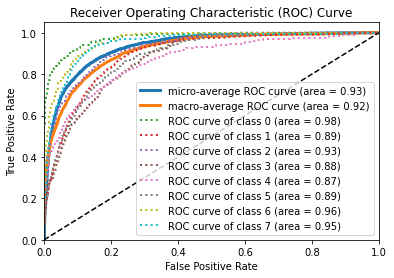

ValueError: ignored

In [0]:
# worst model - basic CNN 
plot_model_roc_curve(basic_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1,2,3,4,5,6,7]) 

# best model - transfer learning with fine-tuning & image augmentation 
plot_model_roc_curve(tl_img_aug_finetune_cnn, test_imgs_scaled, 
                         true_labels=test_labels_enc, 
                         class_names=[0, 1,2,3,4,5,6,7])

In [0]:
    testing_images=test_imgs
    testing_labels=test_labels
    validation_images=validation_imgs
    validation_labels= validation_labels
    training_images=train_imgs
    training_labels=train_labels
    model_fe=tl_img_aug_finetune_cnn#tl_img_aug_finetune_cnn
    training_features = model_fe.predict(training_images)
    validation_features = model_fe.predict(validation_images)
    testing_features = model_fe.predict(testing_images)

    from sklearn.linear_model import Perceptron
    ppn = Perceptron()
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    from sklearn.tree import DecisionTreeClassifier
    tree =  DecisionTreeClassifier()
    from sklearn.svm import SVC
    svm_l = SVC(kernel='linear')
    svm_k = SVC()
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier()
    from sklearn.ensemble import ExtraTreesClassifier
    et = ExtraTreesClassifier()
    from sklearn.ensemble import AdaBoostClassifier
    adaboost = AdaBoostClassifier()
    from sklearn.ensemble import GradientBoostingClassifier
    gradboost = GradientBoostingClassifier()
    
    from sklearn.feature_selection import SelectFromModel
    fs_model = SelectFromModel(ExtraTreesClassifier(n_estimators=50), prefit=False)
    training_features_new = fs_model.fit_transform(training_features, training_labels)
    validation_features_new = fs_model.transform(validation_features)
    testing_features_new = fs_model.transform(testing_features)
    
    classifier_list = [ppn, lr, tree, svm_l, svm_k, knn, rf, et, adaboost]
    classifier_label = ['Perceptron', 'Logistic Regression', 'Decision Tree', 'Linear SVM', 'Gaussian SVM', 'K Nearest Neighbour', 'Random Forest', 'Extra Tree', 'AdaBoost']
    
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
    scoring = ['accuracy', 'f1_weighted']
    print('Cross validation:')
    for classifier, label in zip(classifier_list, classifier_label):
        scores = cross_validate(estimator=classifier, X=training_features, y=training_labels, cv=10, scoring=scoring)
        print("[%s]\nAccuracy: %0.3f\tF1 Weighted: %0.3f"
                % (label, scores['test_accuracy'].mean(), scores['test_f1_weighted'].mean()))

ValueError: ignored

In [0]:
!ls -l /content/gdrive/My\ Drive/research/model/

total 1795220
-rw------- 1 root root   9745592 May  5 09:26 base_cnn.h5
-rw------- 1 root root   9745536 May  6 03:34 base_cnn_model.h5
-rw------- 1 root root   9745536 May  6 04:10 base_cnn_model_sgd.h5
-rw------- 1 root root   4881936 May  6 03:40 base_cnn_weights0.h5
-rw------- 1 root root   4881920 May  6 02:30 base_cnn_weights1.h5
-rw------- 1 root root   4881928 May  6 03:12 base_cnn_weights2.h5
-rw------- 1 root root   4881920 May  6 02:09 base_cnn_weights.h5
-rw------- 1 root root   4881936 May  6 04:16 base_cnn_weights_sgd.h5
-rw------- 1 root root  10002272 May  5 04:53 BiherNet_combine.model
-rw------- 1 root root   5021472 May  5 04:58 BiherNet_weight_1.h5
-rw------- 1 root root  45613184 May  5 07:32 bottleneck_features_train.npy
-rw------- 1 root root  12583040 May  5 07:32 bottleneck_features_validation.npy
-rw------- 1 root root      5700 May  5 07:31 bottleneck_labels_train.npy
-rw------- 1 root root      1708 May  5 07:32 bottleneck_labels_validation.npy
-rw------- 1 

In [0]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 


def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                        

def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)


def plot_model_decision_surface(clf, train_features, train_labels,
                                plot_step=0.02, cmap=plt.cm.RdYlBu,
                                markers=None, alphas=None, colors=None):
    
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = train_features[:, 0].min() - plot_step, train_features[:, 0].max() + plot_step
    y_min, y_max = train_features[:, 1].min() - plot_step, train_features[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf_est = clone(clf)
    clf_est.fit(train_features,train_labels)
    if hasattr(clf_est, 'predict_proba'):
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
    
    le = LabelEncoder()
    y_enc = le.fit_transform(train_labels)
    n_classes = len(le.classes_)
    plot_colors = ''.join(colors) if colors else [None] * n_classes
    label_names = le.classes_
    markers = markers if markers else [None] * n_classes
    alphas = alphas if alphas else [None] * n_classes
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_enc == i)
        plt.scatter(train_features[idx, 0], train_features[idx, 1], c=color,
                    label=label_names[i], cmap=cmap, edgecolors='black', 
                    marker=markers[i], alpha=alphas[i])
    plt.legend()
    plt.show()


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
    y_test = label_binarize(true_labels, classes=class_labels)
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prob = clf.predict_proba(features)
            y_score = prob[:, prob.shape[1]-1] 
        elif hasattr(clf, 'decision_function'):
            prob = clf.decision_function(features)
            y_score = prob[:, prob.shape[1]-1]
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(y_test, y_score)      
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'
                                 ''.format(roc_auc),
                 linewidth=2.5)
        
    elif n_classes > 2:
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(6, 4))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]), linewidth=3)

        for i, label in enumerate(class_labels):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(label, roc_auc[i]), 
                     linewidth=2, linestyle=':')
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()